# Kaggle Employee Attrition DataSet

###Primary goal is to analyze the top categories that affect employee satisfaction and retention rate based on features like salary, distance from job location, remote flexibility, worklife balance, etc.

###Other questions:
####1) What education pays the most/least?
####2) What can we learn about job locations and region?
####3) Can we see what to improve on a job description to improve HR job prospects to sustainability?

####Education
####1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'

####EnvironmentSatisfaction
####1 'Low', 2 'Medium', 3 'High', 4 'Very High'

####JobInvolvement
####1 'Low', 2 'Medium', 3 'High', 4 'Very High'

####JobSatisfaction
####1 'Low', 2 'Medium', 3 'High', 4 'Very High'

####PerformanceRating
####1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'

####RelationshipSatisfaction
####1 'Low', 2 'Medium', 3 'High', 4 'Very High'

####WorkLifeBalance
####1 'Bad', 2 'Good', 3 'Better', 4 'Best'


In [3]:
# !pip install scikit-plot
import pdb
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
import warnings
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import tree
from sklearn import metrics
import statsmodels.api as sm

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn import svm, datasets
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/WA_Fn-UseC_-HR-Employee-Attrition.csv")

##1) Start with Exploratory Data Analysis 

In [ ]:
df.info()
df.describe()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:

df1 = df[['BusinessTravel', 'Department', 'EducationField', 'JobRole']]
df1.head(5)



,BusinessTravel,Department,EducationField,JobRole
0,Travel_Rarely,Sales,Life Sciences,Sales Executive
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist
2,Travel_Rarely,Research & Development,Other,Laboratory Technician
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician


In [ ]:
df2 = df[['Gender', 'MaritalStatus', 'OverTime', 'Attrition']] 
df2.head(5)

,Gender,MaritalStatus,OverTime,Attrition
0,Female,Single,Yes,Yes
1,Male,Married,No,No
2,Male,Single,Yes,Yes
3,Female,Married,Yes,No
4,Male,Married,No,No


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#checking for missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values.head(200)

,Total,Percent
YearsWithCurrManager,0,0.0
EmployeeCount,0,0.0
JobLevel,0,0.0
JobInvolvement,0,0.0
HourlyRate,0,0.0
Gender,0,0.0
EnvironmentSatisfaction,0,0.0
EmployeeNumber,0,0.0
EducationField,0,0.0
JobSatisfaction,0,0.0


### Fortunately this dataset doesn't have any null/missing values

In [ ]:
# Drop some unncessary columns
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'])

# Create list of category and continuous columns
categorical_columns = df.select_dtypes(['object']).columns
print(categorical_columns)
print(f"The number of categorical columns is {len(categorical_columns)}")


# Create List of Numeric Columns
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print(f"The number of numerical columns is {len(numeric_columns)}")

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
The number of categorical columns is 8
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
The number of numerical columns is 23


###Plot some visuals for EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

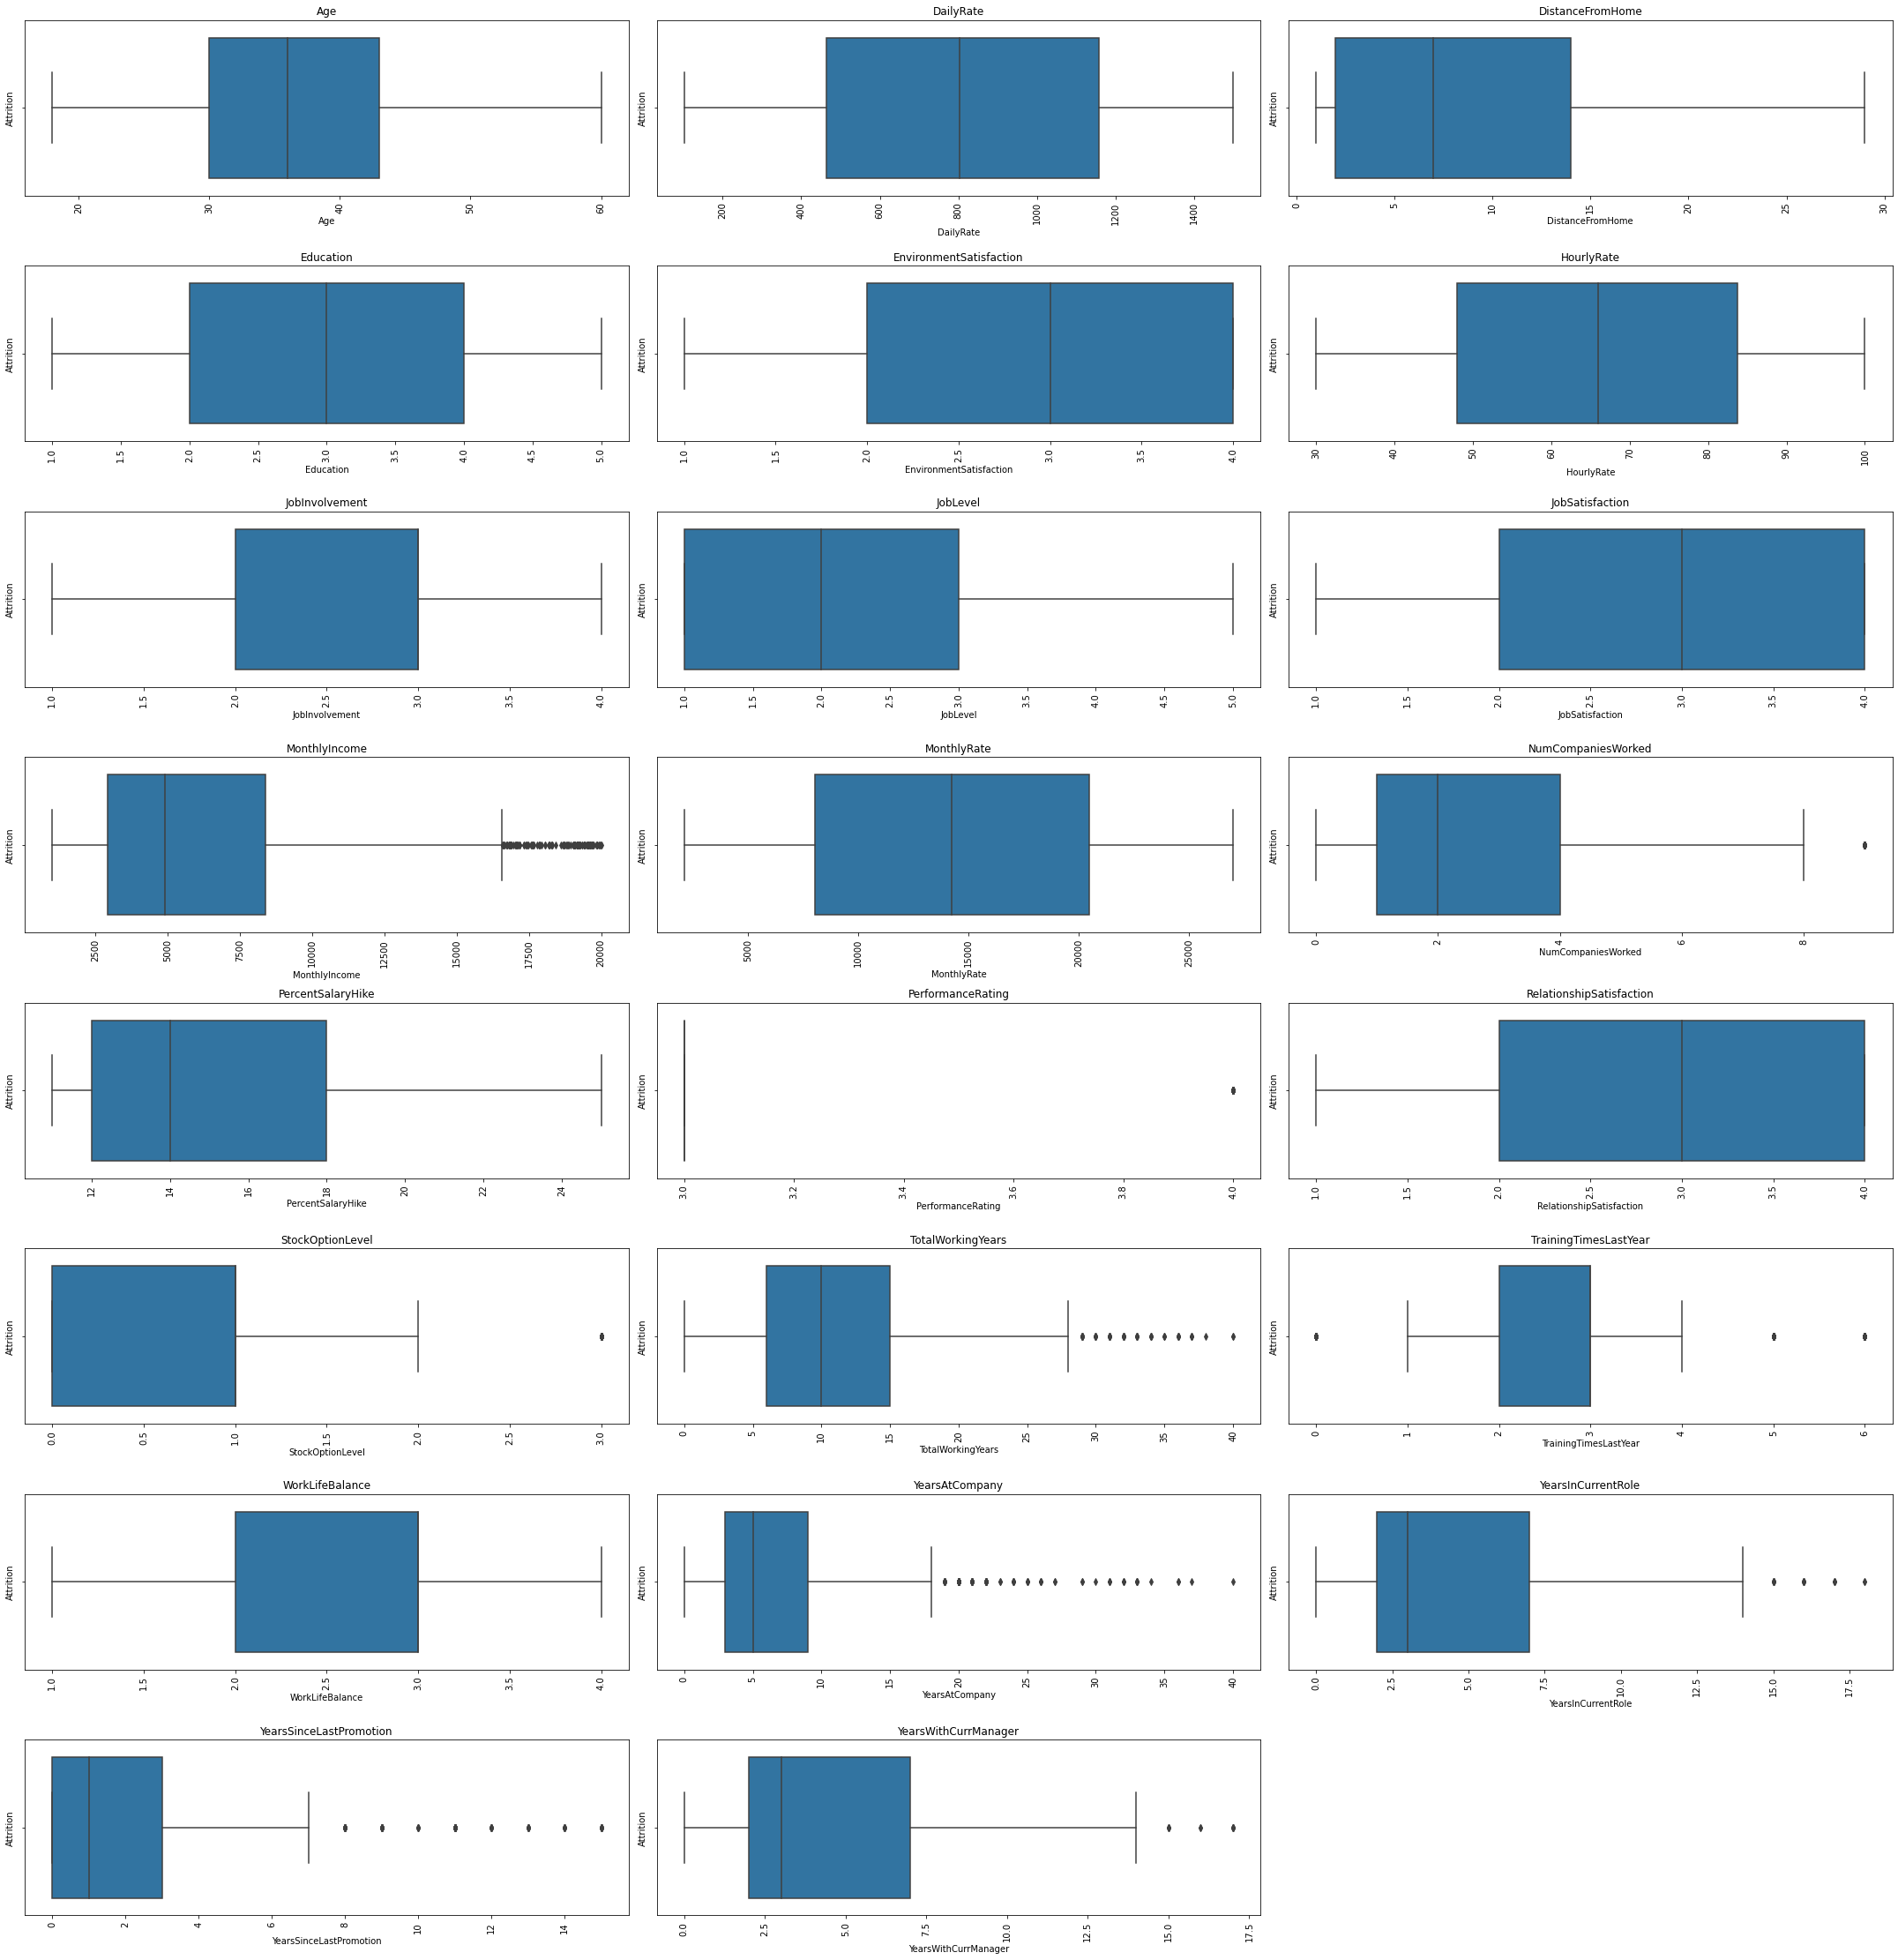

In [ ]:
#Plot boxplots on numeric columns
plt.figure(figsize=(30,100))

for i, column in enumerate(numeric_columns):
    plt.subplot(26,3,i+1)
    sns.boxplot(df[column])
    plt.title("{}".format(column))
    plt.ylabel("Attrition")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

### Select boxplots with outliers
####MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TainingTimesLastYear, YearsAtCompany, YeartsInCurrentRole, YearsSincLastPromotion, YearsWithCurrManager

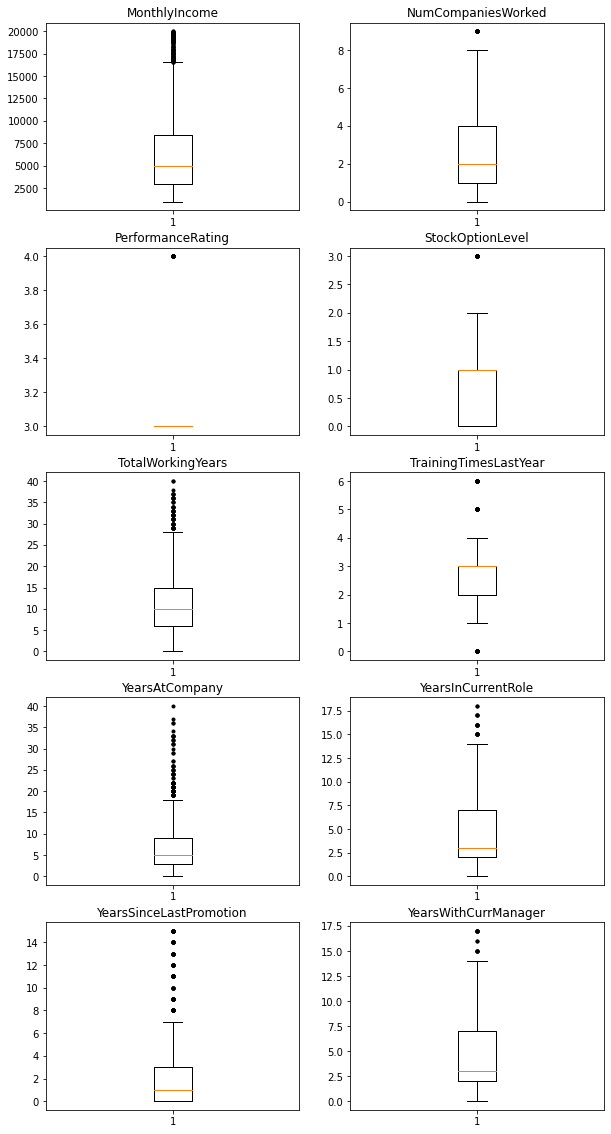

In [ ]:
# boxplots for outliers
fig = plt.figure(figsize=(10,20))
outliercols = ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
for i, column in enumerate(outliercols):
    plt.subplot(5, 2, i+1)
    plt.boxplot(df[column], sym='k.')
    plt.title("{}".format(column))
# plt.tight_layout()
plt.show()

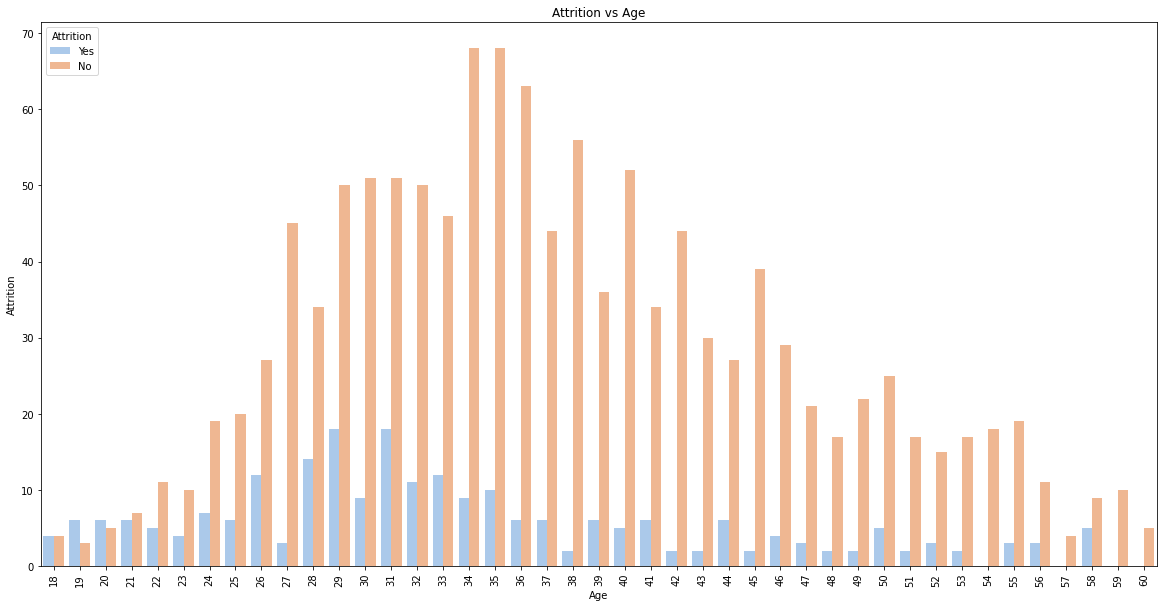

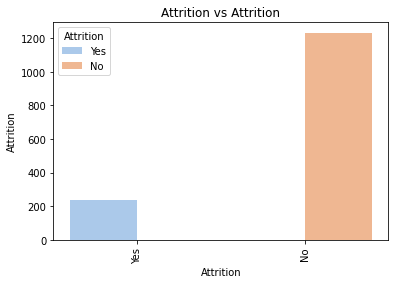

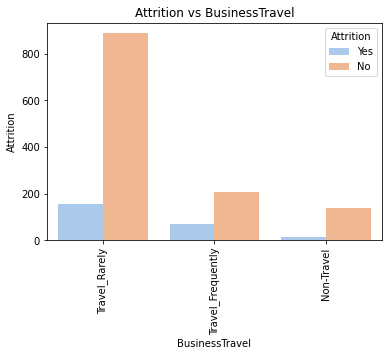

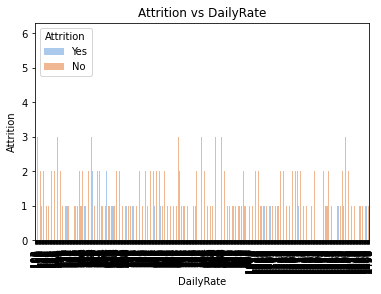

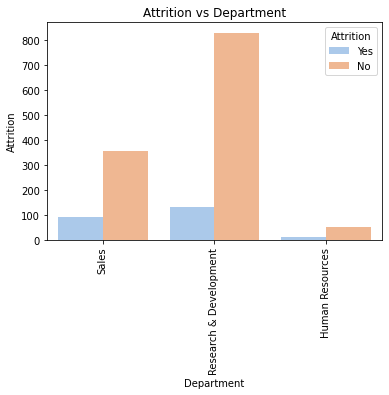

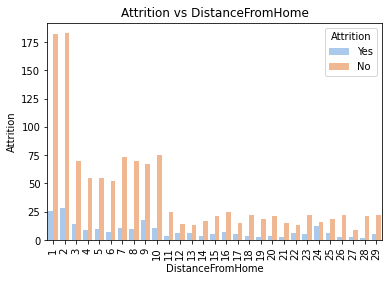

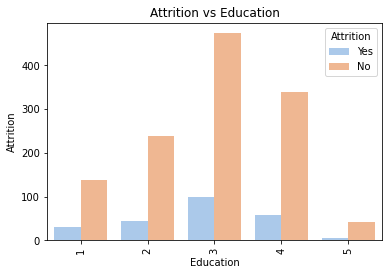

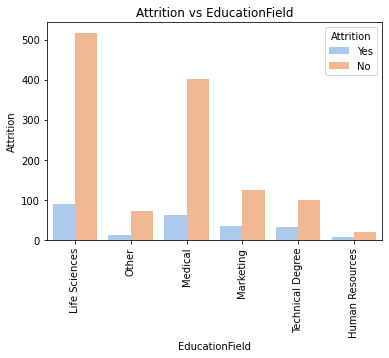

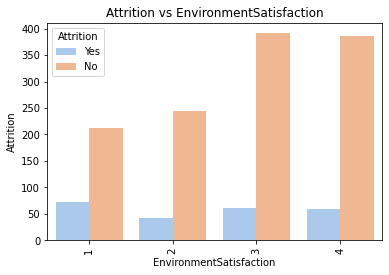

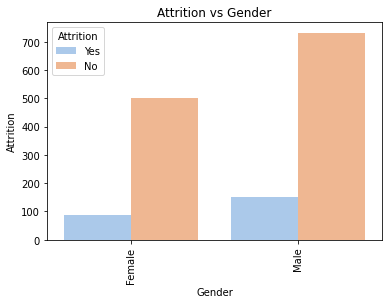

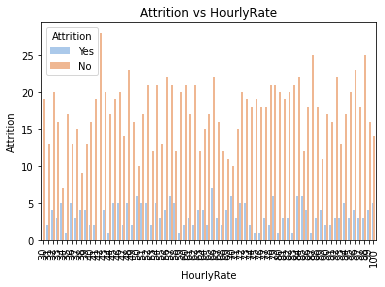

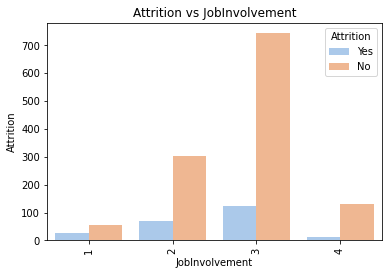

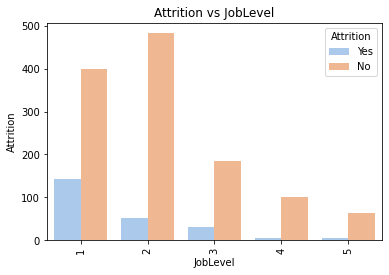

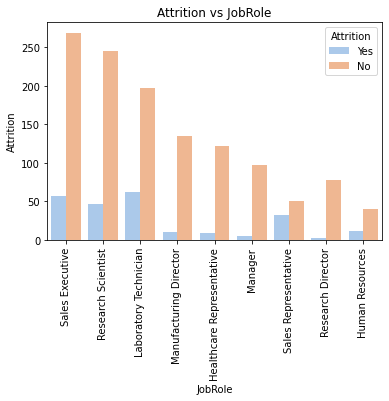

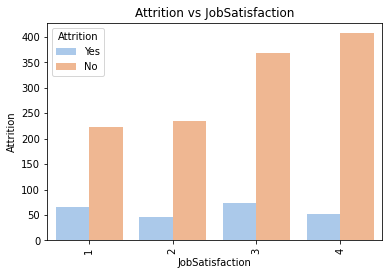

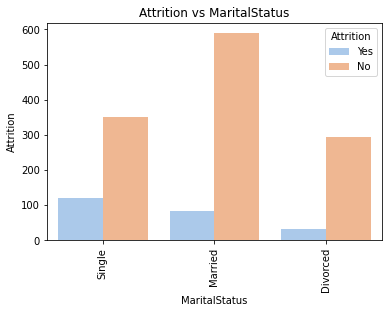

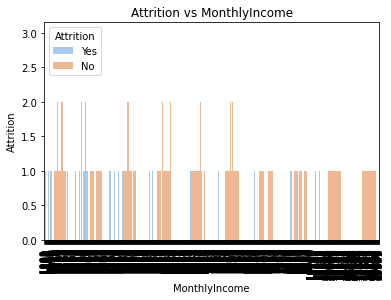

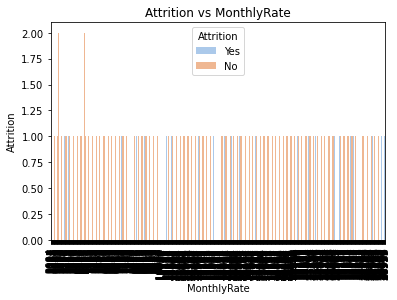

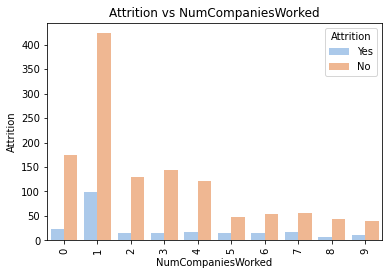

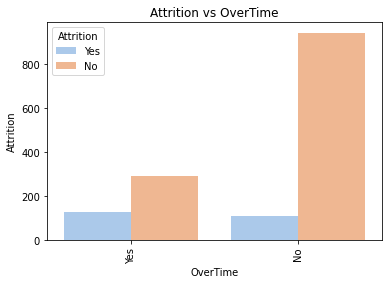

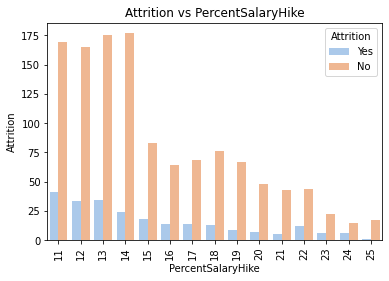

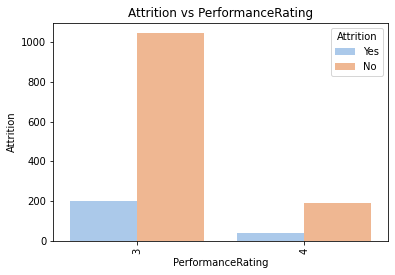

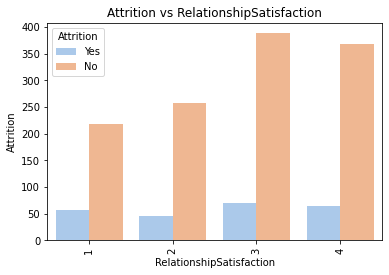

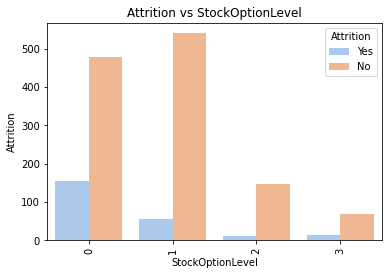

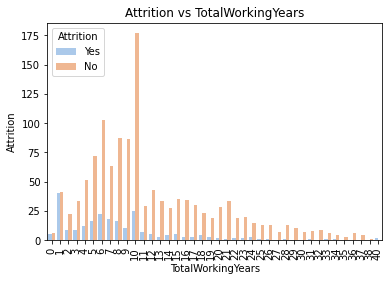

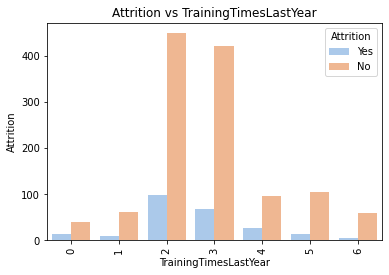

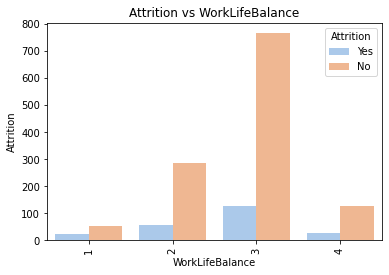

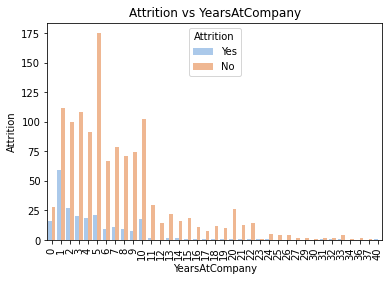

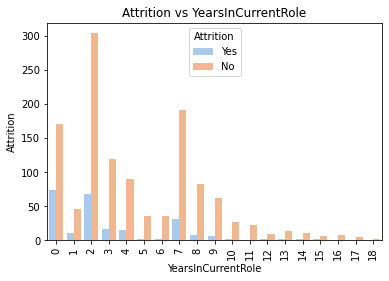

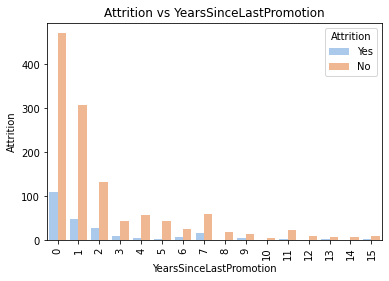

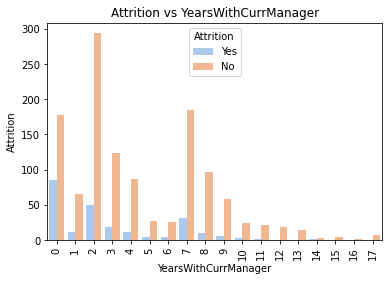

In [ ]:
# Plot jointplots to compare relationships of features and Attrition (target)
# Encode certain fields to aprropriate status
# Create new dataframe for jointplots

# df1 = pd.DataFrame(df)
# df1.head(10)

# colslist = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]

# ed_map = {1:"Below College", 2:"College", 3:'Bachelor', 4:'Master', 5:'Doctor'}
# envs_map = {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}
# perfrat_map = {1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'}
# wlb_map = {1:'Bad', 2:'Good', 3:'Better', 4:'Best'}

# # dict_list = [{1:"Below College", 2:"College", 3:'Bachelor', 4:'Master', 5:'Doctor'}, {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}, {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}, {1:'Low', 2:'Medium', 3:'High', 4:'Very High'},
# #             {1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding'}, {1:'Low', 2:'Medium', 3:'High', 4:'Very High'}, {1:'Bad', 2:'Good', 3:'Better', 4:'Best'}]
#   # df[col] = df[col].map(dict_list)
# df1["Education"] = df1["Education"].map(ed_map)
# df1["EnvironmentSatisfaction"] = df1["EnvironmentSatisfaction"].map(envs_map)
# df1["JobInvolvement"] = df1["JobInvolvement"].map(envs_map)
# df1["JobSatisfaction"] = df1["JobSatisfaction"].map(envs_map)
# df1["PerformanceRating"] = df1["PerformanceRating"].map(perfrat_map)
# df1["RelationshipSatisfaction"] = df1["RelationshipSatisfaction"].map(envs_map)
# df1["WorkLifeBalance"] = df1["WorkLifeBalance"].map(wlb_map)

# df1.head(10)

plt.figure(figsize=(20,10))
for column in df.columns:
    # plt.figure(figsize=(20,10))
    sns.countplot(x= df[column], hue= df['Attrition'], palette="pastel")
    plt.title("Attrition vs {}".format(column))
    plt.ylabel("Attrition")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')
    plt.show()





/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; yo

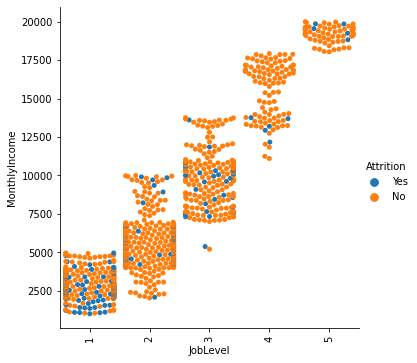

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; y

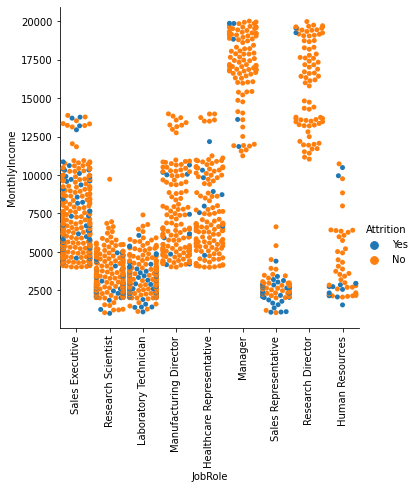

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


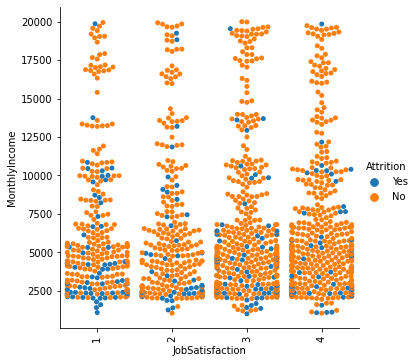

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


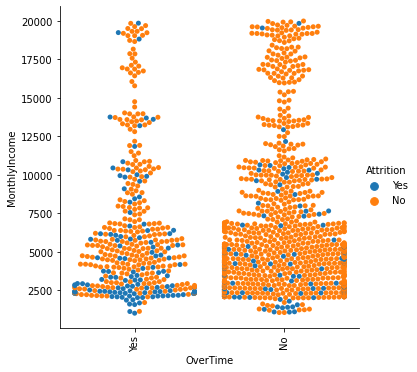

In [ ]:
# create function for  for categorical features
catlist = ['JobLevel', 'JobRole', 'JobSatisfaction', 'OverTime']
for col in catlist:
  g = sns.catplot(x=col, y="MonthlyIncome", hue="Attrition", kind="swarm", data=df)
  plt.title('')
  g.set_xticklabels(rotation=90)
  plt.show()



### Create Feature Selection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

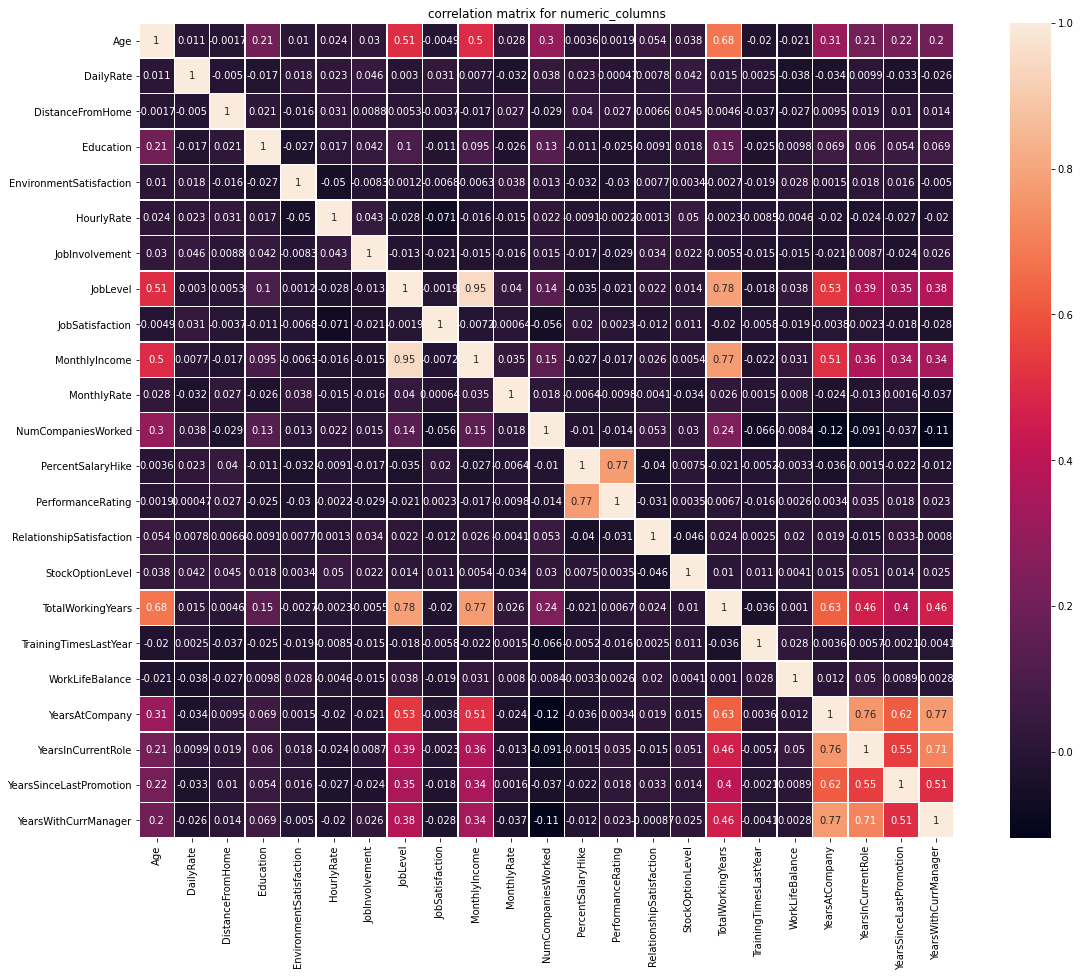

In [ ]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}

# pandas method to numerically encode our attrition target variable
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: target_map[x])
df.info()

# Correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df[numeric_columns].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix for numeric_columns")
plt.show()

In [ ]:
df[numeric_columns].corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


###Encoding for word labels

In [ ]:
# label_encoder object knows how to understand word labels. 

label_encoder = preprocessing.LabelEncoder() 

wordlist = ['BusinessTravel', 'Department', 'EducationField', 'JobRole']

# Encode labels in column word labels 
for col in wordlist:
  df[col] = label_encoder.fit_transform(df[col])

# one-hot encoding the Grade variable: 
gradelist = ['Gender', 'MaritalStatus', 'OverTime', 'Attrition']

for col in gradelist:
  df[col] = pd.get_dummies(df[col], prefix=col, drop_first=True)


In [ ]:
df3 = df[['BusinessTravel', 'Department', 'EducationField', 'JobRole']]
df3.head(5)

,BusinessTravel,Department,EducationField,JobRole
0,2,2,1,7
1,1,1,1,6
2,2,1,4,2
3,1,1,1,6
4,2,1,3,2


In [ ]:
df4 = df[['Gender', 'MaritalStatus', 'OverTime', 'Attrition']]
df4.head(5)

,Gender,MaritalStatus,OverTime,Attrition
0,0,0,1,1
1,1,1,0,0
2,1,0,1,1
3,0,1,1,0
4,1,1,0,0


In [ ]:
df = df.drop(['Attrition'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   uint8
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int64
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

##Principal Component Analysis

In [ ]:
# Y is the target variable
Y = df['Attrition_numeric']

# X is the feature set
X = df.drop(['Attrition_numeric'], axis=1)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)
print(X_std)

           Age  BusinessTravel  ...  YearsSinceLastPromotion  YearsWithCurrManager
0     0.446350        0.590048  ...                -0.679146              0.245834
1     1.322365       -0.913194  ...                -0.368715              0.806541
2     0.008343        0.590048  ...                -0.679146             -1.155935
3    -0.429664       -0.913194  ...                 0.252146             -1.155935
4    -1.086676        0.590048  ...                -0.058285             -0.595227
...        ...             ...  ...                      ...                   ...
1465 -0.101159       -0.913194  ...                -0.679146             -0.314873
1466  0.227347        0.590048  ...                -0.368715              0.806541
1467 -1.086676        0.590048  ...                -0.679146             -0.314873
1468  1.322365       -0.913194  ...                -0.679146              1.086895
1469 -0.320163        0.590048  ...                -0.368715             -0.595227

[14

Text(0, 0.5, 'Cumulative explained variance')

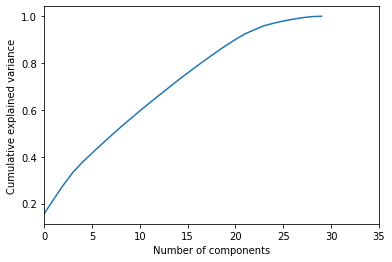

In [ ]:
# plotting the components vs cumulative variance rate
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,35,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### It looks like at 23 components, theres a variance of 90% which means we can drop the components after 23

In [ ]:
# We select the number of components based on the variance above
pca = PCA(n_components=23)
X_PCA = pca.fit_transform(X_std)
pca_var = pca.explained_variance_ratio_
print('Explained variance ratio: ', pca.explained_variance_ratio_.sum())

Explained variance ratio:  0.9425803651003607


In [ ]:
X_PCA = pd.DataFrame(X_PCA)
print(X_PCA)

            0         1         2   ...        20        21        22
0    -0.371068  0.961334 -1.313265  ...  1.382843 -1.067037 -0.296831
1     0.604057 -1.627164  2.848083  ... -0.369601 -0.488453 -1.964171
2    -2.448743  1.639177  0.153816  ...  0.660573 -1.301700  0.047912
3    -0.830345 -0.223994 -1.211320  ... -1.697156 -0.847724  0.252900
4    -1.816613  1.321446 -0.366554  ...  1.546202 -1.643815  0.773814
...        ...       ...       ...  ...       ...       ...       ...
1465 -0.674163  0.762963  0.663415  ... -0.053437 -1.004877 -0.346323
1466  0.959513  0.398446  0.187605  ...  0.351725 -0.997703 -0.411139
1467 -1.191735 -0.545236  2.567214  ... -0.427391  0.365001  0.601741
1468  0.955863 -0.452593 -1.067219  ... -1.805616 -0.427252 -1.945168
1469 -1.118416  0.584566 -0.470943  ... -0.817188 -1.114336  0.350890

[1470 rows x 23 columns]


## Base Modeling splitting datasets 

In [ ]:
X_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1470 non-null   float64
 1   1       1470 non-null   float64
 2   2       1470 non-null   float64
 3   3       1470 non-null   float64
 4   4       1470 non-null   float64
 5   5       1470 non-null   float64
 6   6       1470 non-null   float64
 7   7       1470 non-null   float64
 8   8       1470 non-null   float64
 9   9       1470 non-null   float64
 10  10      1470 non-null   float64
 11  11      1470 non-null   float64
 12  12      1470 non-null   float64
 13  13      1470 non-null   float64
 14  14      1470 non-null   float64
 15  15      1470 non-null   float64
 16  16      1470 non-null   float64
 17  17      1470 non-null   float64
 18  18      1470 non-null   float64
 19  19      1470 non-null   float64
 20  20      1470 non-null   float64
 21  21      1470 non-null   float64
 22  

In [ ]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y, test_size = 0.2, random_state = 465)

print("Training set: {}".format(X_train.shape[0]))
print("Test set: {}".format(X_test.shape[0]))

Training set: 1176
Test set: 294


### Create a function to provide confusion matrix and metrics of each model

In [ ]:
# Create a function to include confusion matrix in every model output as part
# of model performance
def print_result(model, X_test, y_test):
    
    y_pred = model.predict(X_test) #prediction
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
     
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred)
    conf_mat_df = pd.DataFrame(conf_mat, 
                               index= ['actual_no_attrition', 'actual_yes_attrition'],
                              columns = ['predict_no_attrition', 'predict_yes_attrition'])   
    print('train_score:{:.2f}'.format(train_score))
    print('test_score:{:.2f}'.format(test_score))
    print('accuracy:{:.2f}'.format(accuracy))
    print("")
    print('Confusion Matrix:', end='\n')
    print(conf_mat_df, end='\n\n')
    
    report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
    print("============== Classification Report===========")
    print(report)

#1. Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

LogReg_params = {
    'max_iter': 10000,
    'class_weight': 'balanced',
    'penalty': 'l2', 'C': 0.8
}

# Use 5 fold cross-validation to train the model
LogReg = LogisticRegression(**LogReg_params)
LogReg.fit(X_train, y_train)
LogReg_cv_scores = cross_val_score(LogReg, X_train, y_train, cv=5)

# print score and prediction results
print_result(LogReg, X_test, y_test)
print('accuracy for 5 folds:{}'.format(LogReg_cv_scores))
print('Mean cross validation score: {:.3f}'.format(np.mean(LogReg_cv_scores)))


train_score:0.75
test_score:0.75
accuracy:0.75

Confusion Matrix:
                      predict_no_attrition  predict_yes_attrition
actual_no_attrition                    179                     62
actual_yes_attrition                    11                     42

============== Classification Report===========
              precision    recall  f1-score   support

    Negative       0.94      0.74      0.83       241
    Positive       0.40      0.79      0.54        53

    accuracy                           0.75       294
   macro avg       0.67      0.77      0.68       294
weighted avg       0.85      0.75      0.78       294

accuracy for 5 folds:[0.72033898 0.74042553 0.74042553 0.75744681 0.73617021]
Mean cross validation score: 0.739


## Fine tune our parameters using GridsearchCV

In [ ]:

param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
             'penalty': ['l2']}

gs_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv= 5)
gs_cv.fit(X_train, y_train)

# summarize results
print("Best: {} using {}".format(gs_cv.best_score_, gs_cv.best_params_))



Best: 0.870757302560404 using {'C': 0.1, 'penalty': 'l2'}


## Rerun Logistic Regression with new parameters

In [ ]:
# Best: 0.870757302560404 using {'C': 0.1, 'penalty': 'l2'}
LogReg_params = {
    'max_iter': 10000,
    'class_weight': 'balanced',
    'penalty': 'l2', 'C': 0.1
}

# Use 5 fold cross-validation to train the model
LogReg = LogisticRegression(**LogReg_params)
LogReg.fit(X_train, y_train)
LogReg_cv_scores = cross_val_score(LogReg, X_train, y_train, cv=5)

# print score and prediction results
print_result(LogReg, X_test, y_test)
print('accuracy for 5 folds:{}'.format(LogReg_cv_scores))
print('Mean cross validation score: {:.3f}'.format(np.mean(LogReg_cv_scores)))


train_score:0.75
test_score:0.75
accuracy:0.75

Confusion Matrix:
                      predict_no_attrition  predict_yes_attrition
actual_no_attrition                    179                     62
actual_yes_attrition                    11                     42

============== Classification Report===========
              precision    recall  f1-score   support

    Negative       0.94      0.74      0.83       241
    Positive       0.40      0.79      0.54        53

    accuracy                           0.75       294
   macro avg       0.67      0.77      0.68       294
weighted avg       0.85      0.75      0.78       294

accuracy for 5 folds:[0.72033898 0.74042553 0.74042553 0.75319149 0.73191489]
Mean cross validation score: 0.737


#KNN Model


In [ ]:
# Run KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn_cv_scores = cross_val_score(knn, X_train, y_train, cv = 5)

print_result(knn, X_test, y_test)
print('accuracy for 5 folds:{}'.format(knn_cv_scores))
print('Mean cross validation score: {:.3f}'.format(np.mean(knn_cv_scores)))


train_score:0.87
test_score:0.82
accuracy:0.82

Confusion Matrix:
                      predict_no_attrition  predict_yes_attrition
actual_no_attrition                    236                      5
actual_yes_attrition                    47                      6

============== Classification Report===========
              precision    recall  f1-score   support

    Negative       0.83      0.98      0.90       241
    Positive       0.55      0.11      0.19        53

    accuracy                           0.82       294
   macro avg       0.69      0.55      0.54       294
weighted avg       0.78      0.82      0.77       294

accuracy for 5 folds:[0.84745763 0.83404255 0.84680851 0.85531915 0.84680851]
Mean cross validation score: 0.846


## Decision Tree Model

In [ ]:
# timing
start_time = time.time()

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)

#Cross-validate using 10 folds.
decision_score = cross_val_score(decision_tree, X_train, y_train, cv=5)

print_result(decision_tree, X_test, y_test)
print('accuracy for 5 folds:{}'.format(decision_score))
print('Mean cross validation score: {:.3f}'.format(np.mean(decision_score)))
print()
print("--- %s seconds ---" % (time.time() - start_time))
#print('Mean:', score.mean(), '\nVariance:', score.std()*2)

train_score:0.87
test_score:0.79
accuracy:0.79

Confusion Matrix:
                      predict_no_attrition  predict_yes_attrition
actual_no_attrition                    230                     11
actual_yes_attrition                    50                      3

============== Classification Report===========
              precision    recall  f1-score   support

    Negative       0.82      0.95      0.88       241
    Positive       0.21      0.06      0.09        53

    accuracy                           0.79       294
   macro avg       0.52      0.51      0.49       294
weighted avg       0.71      0.79      0.74       294

accuracy for 5 folds:[0.79237288 0.81276596 0.82553191 0.84680851 0.80425532]
Mean cross validation score: 0.816

--- 0.06209683418273926 seconds ---


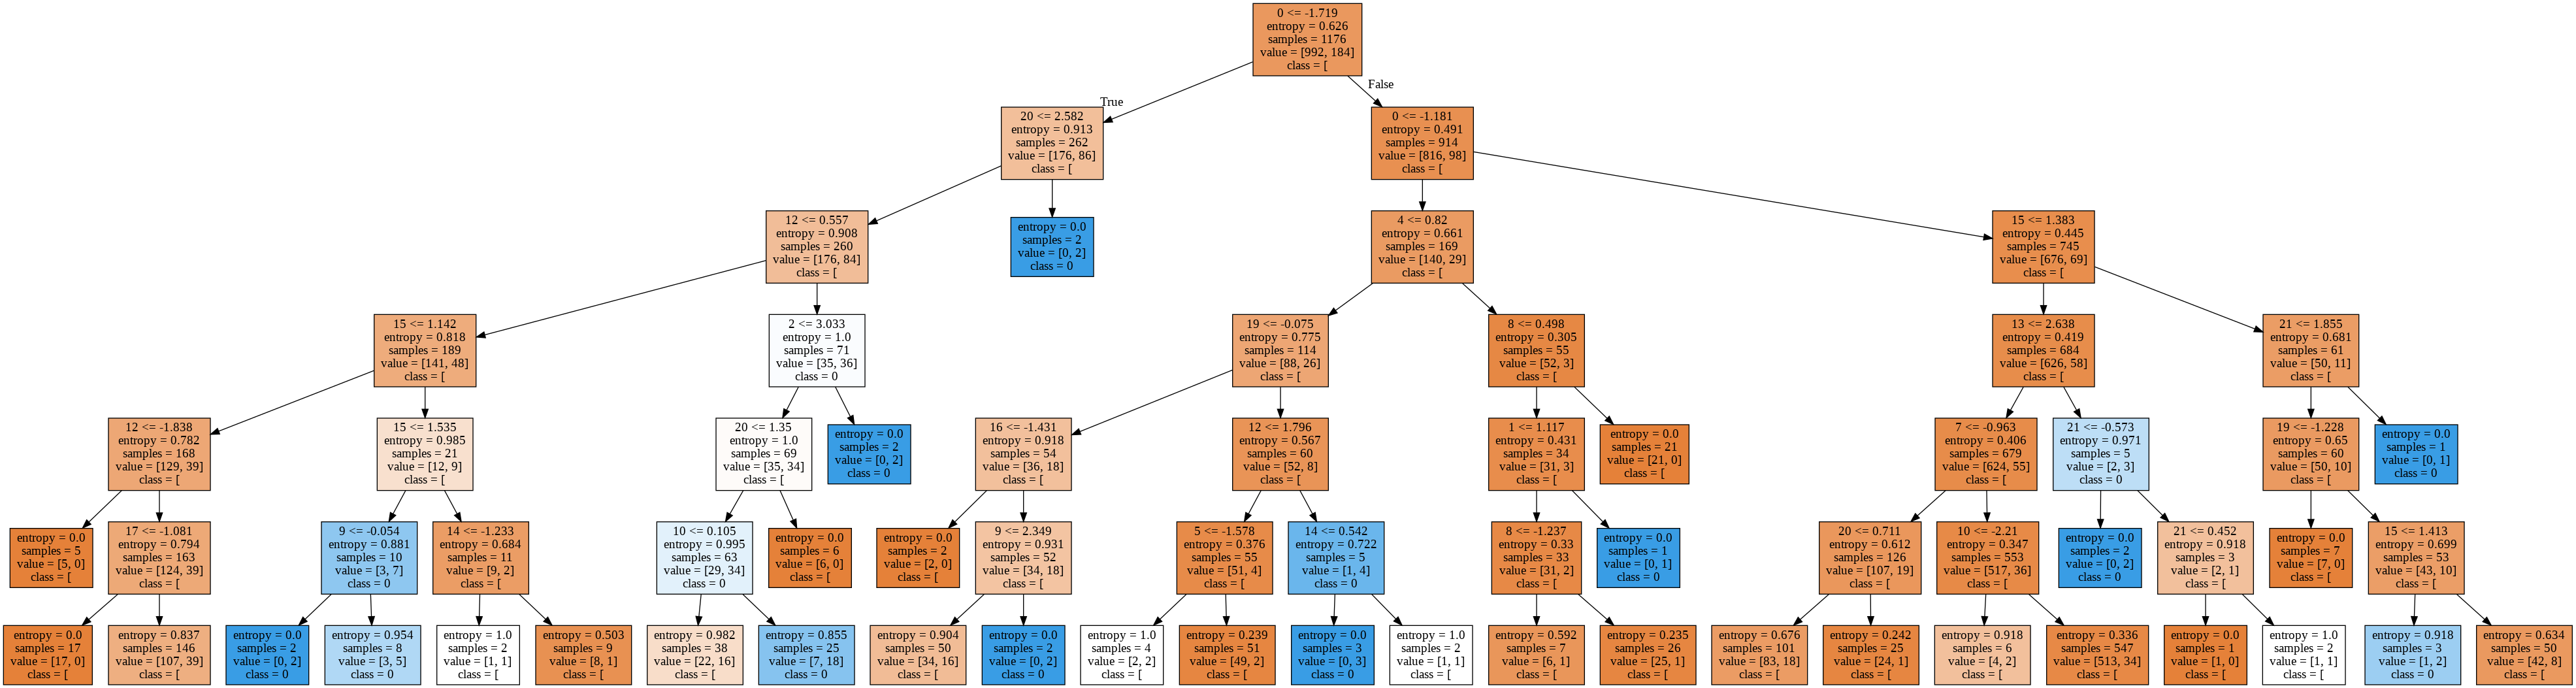

In [ ]:

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
    class_names=str(y_train.unique()),
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest Model

In [ ]:
from sklearn import ensemble
# timing
start_time = time.time()

clf = ensemble.RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)

# Train the classifier
clf.fit(X_train, y_train)

random_forest_score = cross_val_score(clf, X_train, y_train, cv=5)

print_result(clf, X_test, y_test)
print('accuracy for 5 folds:{}'.format(random_forest_score))
print('Mean cross validation score: {:.3f}'.format(np.mean(random_forest_score)))
print()
print("--- %s seconds ---" % (time.time() - start_time))

train_score:1.00
test_score:0.82
accuracy:0.82

Confusion Matrix:
                      predict_no_attrition  predict_yes_attrition
actual_no_attrition                    240                      1
actual_yes_attrition                    52                      1

============== Classification Report===========
              precision    recall  f1-score   support

    Negative       0.82      1.00      0.90       241
    Positive       0.50      0.02      0.04        53

    accuracy                           0.82       294
   macro avg       0.66      0.51      0.47       294
weighted avg       0.76      0.82      0.74       294

accuracy for 5 folds:[0.84745763 0.85531915 0.84680851 0.85957447 0.85531915]
Mean cross validation score: 0.853

--- 27.931450605392456 seconds ---


## Gradient Boosting

In [ ]:
# 500 iterations, use 2-deep trees, and set your loss function.

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier(**params)
gb.fit(X_train, y_train)

print_result(gb, X_test, y_test)

train_score:0.99
test_score:0.85
accuracy:0.85

Confusion Matrix:
                      predict_no_attrition  predict_yes_attrition
actual_no_attrition                    232                      9
actual_yes_attrition                    36                     17

============== Classification Report===========
              precision    recall  f1-score   support

    Negative       0.87      0.96      0.91       241
    Positive       0.65      0.32      0.43        53

    accuracy                           0.85       294
   macro avg       0.76      0.64      0.67       294
weighted avg       0.83      0.85      0.82       294



### Measure the frequency of features over the course of the decision trees.

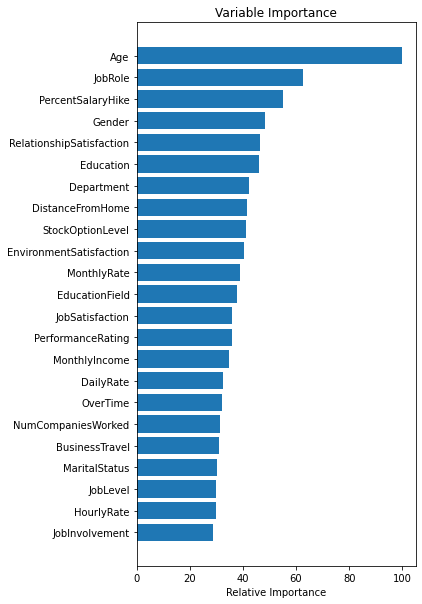

In [ ]:
feature_importance = clf.feature_importances_

plt.figure(figsize=(5,10))

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Compare all models by confusion matrix and scores

In [ ]:
# Print all confusion matrix to compare scores
print("============================================================")
print('Logistic Regression Classifier')
print("============================================================")
print_result(LogReg, X_test, y_test)
print("")
print("============================================================")
print('KNN')
print("============================================================")
print_result(knn, X_test, y_test)
print("")
print("============================================================")
print('Decision Tree')
print("============================================================")
print_result(decision_tree, X_test, y_test)
print("")
print("============================================================")
print('Random Forest')
print("============================================================")
print_result(gb, X_test, y_test) 
print("")
print("============================================================")
print('Gradient Boosting')
print("============================================================")
print_result(clf, X_test, y_test)


Logistic Regression Classifier
train_score:0.75
test_score:0.75
accuracy:0.75

Confusion Matrix:
                      predict_no_attrition  predict_yes_attrition
actual_no_attrition                    179                     62
actual_yes_attrition                    11                     42

============== Classification Report===========
              precision    recall  f1-score   support

    Negative       0.94      0.74      0.83       241
    Positive       0.40      0.79      0.54        53

    accuracy                           0.75       294
   macro avg       0.67      0.77      0.68       294
weighted avg       0.85      0.75      0.78       294


KNN
train_score:0.87
test_score:0.82
accuracy:0.82

Confusion Matrix:
                      predict_no_attrition  predict_yes_attrition
actual_no_attrition                    236                      5
actual_yes_attrition                    47                      6

============== Classification Report===========
           

### Insert ROC Curve Plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


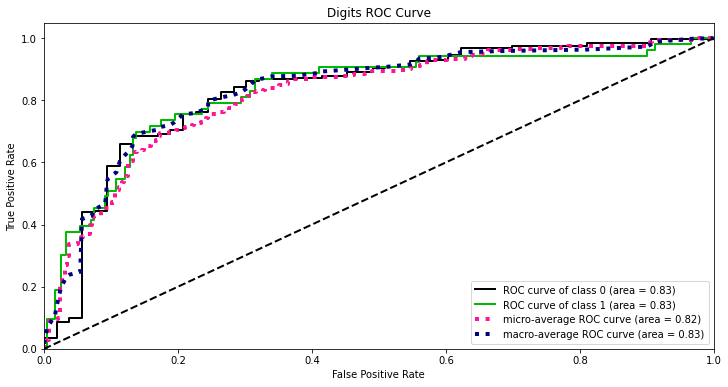

In [ ]:
# Linear Regression ROC Curve Plot
Y_test_probs = LogReg.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Digits ROC Curve", figsize=(12,6));

## Precision-Recall Curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


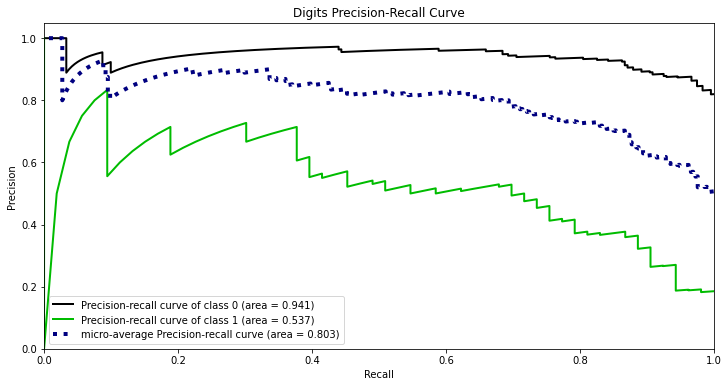

In [ ]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs,
                       title="Digits Precision-Recall Curve", figsize=(12,6));

In [ ]:
def best_feature(n):
    pca.components_[n]
    num = list((pca.components_[n]))
    norm_num = []
    for i in num:
        i = i*1000
        norm_num.append(i)
    names = list(X_std.columns)
    mapped = list(zip(names, norm_num))
    result = pd.DataFrame(mapped, columns = ['names', 'norm_num'])
    itogo = result.sort_values(by = 'norm_num', ascending = False)
    
    return itogo

In [ ]:
# Obtain the list of features based on each component
list_of_feat = []
for i in range(0,23):
    abc = best_feature(i)
    name = abc['names'].loc[abc['norm_num'].idxmax()]
    list_of_feat.append(name)
print(len(list_of_feat))
list_of_feat



23


['TotalWorkingYears',
 'NumCompaniesWorked',
 'PerformanceRating',
 'YearsWithCurrManager',
 'MaritalStatus',
 'OverTime',
 'EducationField',
 'JobSatisfaction',
 'DailyRate',
 'BusinessTravel',
 'TrainingTimesLastYear',
 'Gender',
 'EducationField',
 'RelationshipSatisfaction',
 'DistanceFromHome',
 'RelationshipSatisfaction',
 'TrainingTimesLastYear',
 'EducationField',
 'JobInvolvement',
 'JobSatisfaction',
 'StockOptionLevel',
 'StockOptionLevel',
 'YearsSinceLastPromotion']

In [ ]:
# output the coefficients based on importance of the features
coefs1 = []
for i in LogReg.coef_[0]:
    coefs1.append(i)
coefs1

[-0.28763230416766894,
 -0.047895566387811825,
 -0.099083870873497,
 -0.15424417999990117,
 -0.18509358062426967,
 0.2560016447896498,
 -0.08919761698038707,
 -0.2518317507966439,
 -0.38745770007004726,
 0.07174418172075407,
 -0.0485721985097563,
 0.2267091406030391,
 0.5536603186402534,
 0.20716118578733364,
 0.15165412924347701,
 0.008332836056870723,
 -0.12521084737780294,
 0.203549534327431,
 -0.09390503370769611,
 -0.4187434108582898,
 0.11466526837497351,
 -0.4510287882193943,
 0.43770287465771135]

In [ ]:
# Convert to Dataframe of features and coefficients
lg_fi_df=pd.DataFrame() 
lg_fi_df['feature'] = list_of_feat
lg_fi_df['importance'] = coefs1
lg_fi_df

,feature,importance
0,TotalWorkingYears,-0.287632
1,NumCompaniesWorked,-0.047896
2,PerformanceRating,-0.099084
3,YearsWithCurrManager,-0.154244
4,MaritalStatus,-0.185094
5,OverTime,0.256002
6,EducationField,-0.089198
7,JobSatisfaction,-0.251832
8,DailyRate,-0.387458
9,BusinessTravel,0.071744


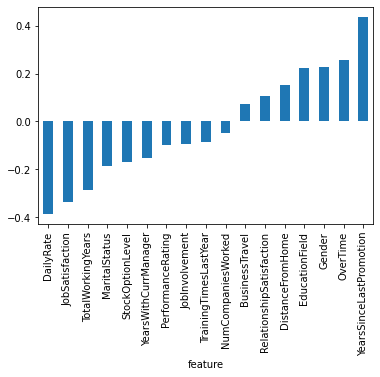

In [ ]:
lg_fi_df.sort_values(by ='importance', ascending=False, inplace=True)
lg_fi_df.groupby('feature').importance.mean().sort_values().plot(kind='bar')

# Conclusion and results
### A quick recap of the selection of the "best" model is where the model contains low levels of attrition or in this case False Negatives (Type II error)

### Based on the comparisons of models and its performance, the Logistic Regression provided the prediction with the lowest amount of False Negatives which portrays a high precision and a lower recall.

### The bar graph above displays the features that reflect the factor of employee attrition inversely or positively. 

#Results:
### The features on the left to right shows the greatest influence on employee attrition, where the negative values means a lower level of attrition and the positive shows a high levels of attrition.

### Low Levels of Attrition:
####1) daily rate
####2) job satisfaction
####3) total working years

###High Levels of Attrition:
####1) Years Since Last Promotion
####2) Over Time
####3) Gender & Education Field